In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
pd.set_option('display.max_columns', None)
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

from sklearn.impute import KNNImputer

In [3]:
df = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

#### Visualize the top 2-3 features with highest correlation

In [5]:
numeric_cols = df.select_dtypes(exclude = 'object').columns

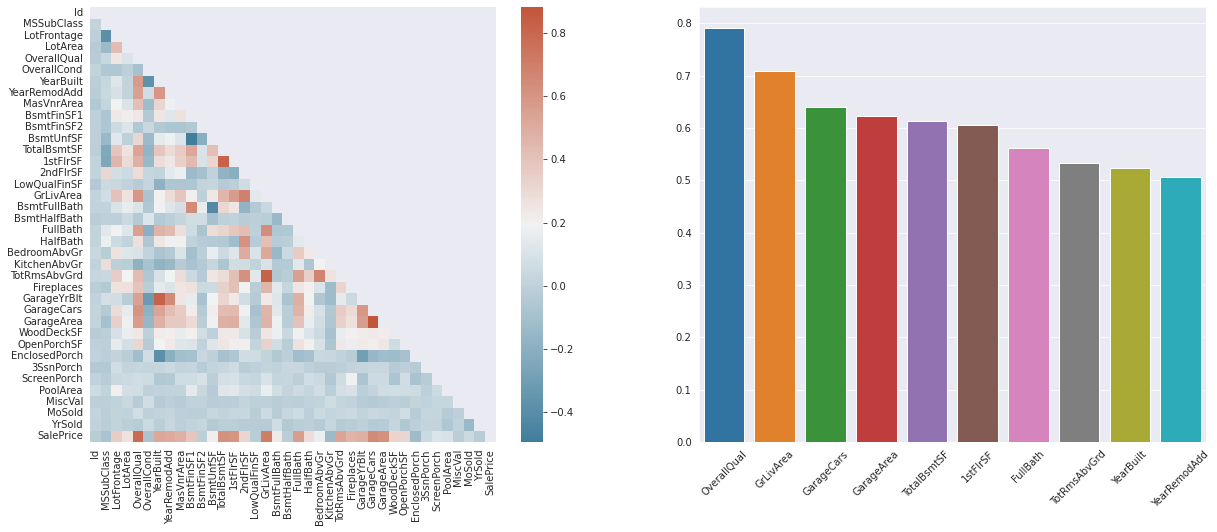

In [6]:
# All correlations
num_corr_matrix = df[numeric_cols].corr()

#Top correlated columns with SalePrice

# top_corr = num_corr_matrix['SalePrice'].loc[num_corr_matrix['SalePrice'].abs().sort_values(ascending = False)[1:10].index]
top_corr = num_corr_matrix['SalePrice'].loc[num_corr_matrix['SalePrice'].abs() > 0.5 ].sort_values(ascending = False)[1:]

# Plot the above two

f, ax = plt.subplots(1, 2, figsize=(20, 8))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
mask = np.triu(np.ones_like(num_corr_matrix, dtype = bool))
sns.heatmap(data = num_corr_matrix, mask = mask, cmap = cmap, ax = ax[0])
sns.barplot(x = top_corr.index, y = top_corr.values, ax = ax[1])
ax[1].tick_params(axis='x', rotation=45);

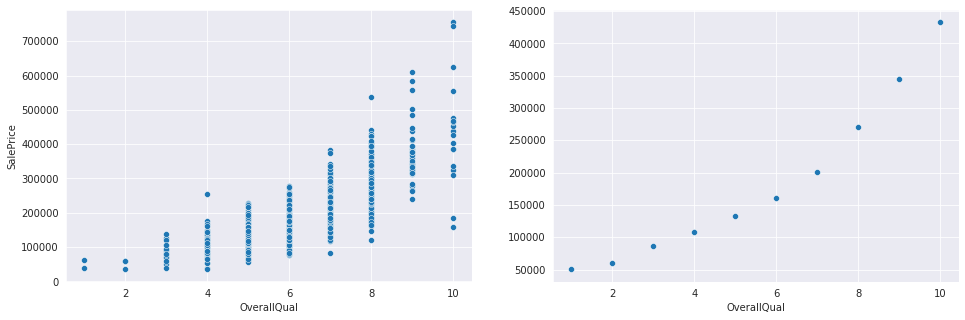

In [7]:
fig, axes = plt.subplots(1,2, figsize=(16,5))
sns.scatterplot(data = df, x = 'OverallQual', y = 'SalePrice', ax = axes[0])
grouped = df.groupby('OverallQual').median()['SalePrice']
sns.scatterplot(x = grouped.index, y = grouped.values, ax = axes[1]);

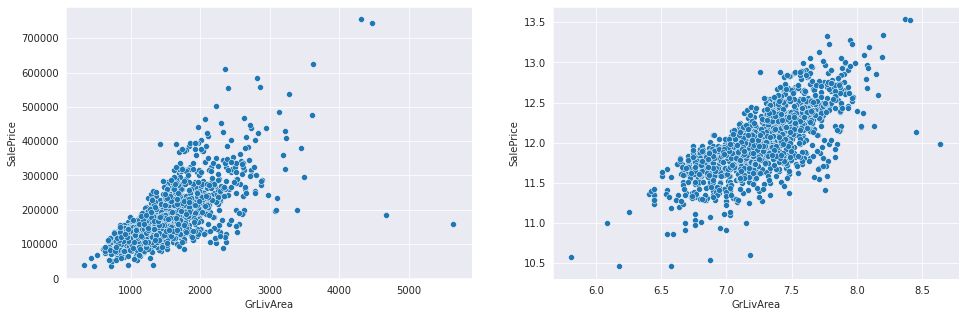

In [8]:
fig, axes = plt.subplots(1,2, figsize = (16,5))
sns.scatterplot(data = df, x = 'GrLivArea', y = 'SalePrice', ax = axes[0])
sns.scatterplot(x = np.log(df['GrLivArea']), y = np.log(df['SalePrice']), ax = axes[1]);


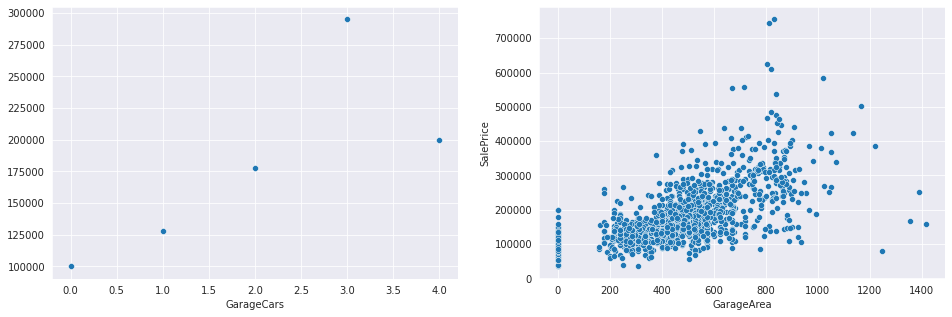

In [9]:
fig, axes = plt.subplots(1,2, figsize = (16,5))
sns.scatterplot(data = df, x = 'GarageArea', y = 'SalePrice', ax = axes[1])
grouped = df.groupby('GarageCars').median()['SalePrice']
sns.scatterplot( x = grouped.index, y = grouped.values, ax = axes[0]);

#### Missing Value Imputation

In [10]:
#Lot frontage, assign the median of the lot_config

grouped = df.groupby('LotConfig').median()['LotFrontage']
df['LotFrontage'] = df.apply(lambda row: grouped.loc[row['LotConfig']]  if pd.isnull(row['LotFrontage']) else row['LotFrontage'], axis = 1)
df['LotFrontage'].isna().sum()

#Alley, assign none to na
df['Alley'].fillna(value = 'NA', inplace = True)

#Basement attrs with Nans, assign no basements to na 
for col in ['BsmtQual', 'BsmtCond','BsmtExposure','BsmtFinType1' ,'BsmtFinType2']:
    df[col].fillna(value = 'NA', inplace = True)
    
#Garage attrs with Nans, assign no garage to na 
for col in ['GarageType','GarageFinish','GarageQual' ,'GarageCond']:
    df[col].fillna(value = 'NA', inplace = True)
    
#No FireplaceQu
df['FireplaceQu'].fillna(value = 'NA', inplace = True)

#No PoolQC
df['PoolQC'].fillna(value = 'NA', inplace = True)

#No Fence
df['Fence'].fillna(value = 'NA', inplace = True)

#Misc Features
df['MiscFeature'] = df['MiscFeature'].apply(lambda a: 0 if pd.isnull(a) else 1)

#Electrical fill int he most frequent value
df['Electrical'].fillna(value = df['Electrical'].mode().values[0], inplace = True)

#Masonry
df['MasVnrType'].fillna(value = 'NA', inplace = True)
df['MasVnrArea'].fillna(value = 0.0, inplace = True)

#garagebuilt
df['GarageYrBlt'] = df.apply(lambda row: row['YearBuilt'] if pd.isnull(row['GarageYrBlt']) else row['GarageYrBlt'], axis=1 )

In [11]:
for col in df.columns:
    missing = df[col].isna().sum()
    if missing > 0:
        print(col, missing, df[col].dtype)

In [12]:
#factorize categorical values and oridnal encode quality values
quality_map = {
    'Ex':4,
    'Gd':3,
    'TA':2,
    'Fa':1,
    'Po':0
}
quality_map_na = {
    'Ex':5,
    'Gd':4,
    'TA':3,
    'Fa':2,
    'Po':1,
    'NA':0   
}

df['ExterQual'] = df['ExterQual'].map(quality_map)
df['ExterCond'] = df['ExterCond'].map(quality_map)
df['BsmtCond'] = df['BsmtCond'].map(quality_map_na)
df['BsmtQual'] = df['BsmtQual'].map(quality_map_na)
df['BsmtExposure'] = df['BsmtExposure'].map({'NA':0, 'No':1, 'Mn':2, 'Av':3, 'Gd':4})
df['BsmtFinType1'] = df['BsmtFinType1'].map({'NA':0, 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6})
df['BsmtFinType2'] = df['BsmtFinType2'].map({'NA':0, 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6})
df['HeatingQC'] = df['HeatingQC'].map(quality_map)
df['CentralAir'] = df['CentralAir'].map({'Y':1, 'N':0})
df['KitchenQual'] = df['KitchenQual'].map(quality_map)
df['Functional'] = df['Functional'].map({'Sal':0, 'Sev':1, 'Maj2':2, 'Maj1':3, 'Mod':4, 'Min2':5, 'Min1':6, 'Typ':7})
df['FireplaceQu'] = df['FireplaceQu'].map(quality_map_na)
df['GarageFinish'] = df['GarageFinish'].map({'NA':0, 'Unf':1, 'RFn':2, 'Fin':3})
df['GarageQual'] = df['GarageQual'].map(quality_map_na)
df['GarageCond'] = df['GarageCond'].map(quality_map_na)
df['PavedDrive'] = df['PavedDrive'].map({'Y':2, 'P':1, 'N':0})
df['PoolQC'] = df['PoolQC'].map(quality_map_na)
df['Fence'] = df['Fence'].map({'NA':0, 'MnWw':1, 'GdWo':2, 'MnPrv':3, 'GdPrv':4})
    

In [13]:
# convert the rest of the category columns to factors, POTENTIAL IMPROVEMENT HERE 

# for col in df.select_dtypes(include='object').columns:
#     df[col], _ = pd.factorize(df[col])
    
# Potential improvement in MS Subclass and Neighborhood etc columns

df.select_dtypes(include = 'object').columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'Electrical',
       'GarageType', 'SaleType', 'SaleCondition'],
      dtype='object')

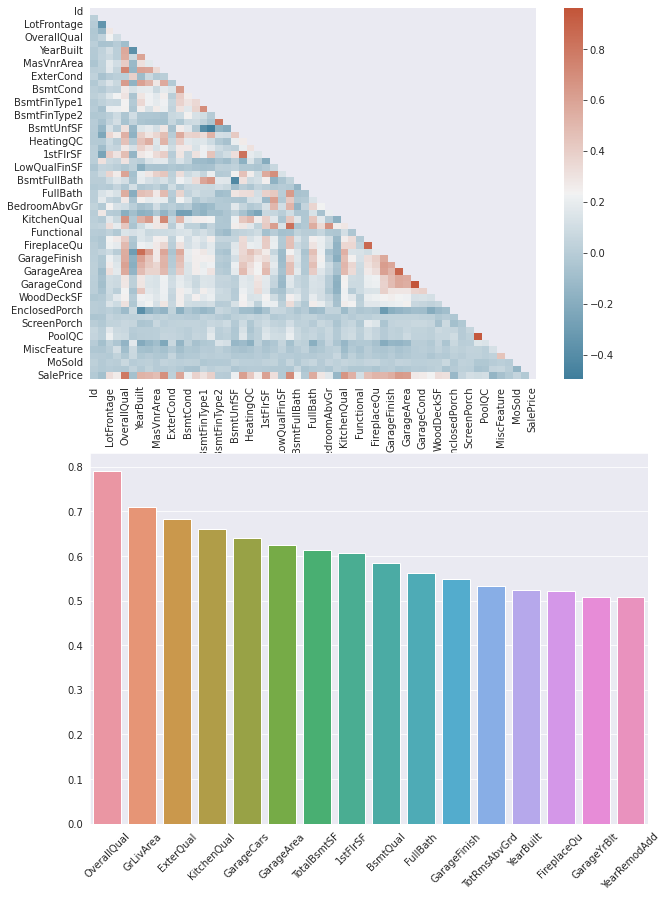

In [14]:
# Check for correlations again
full_corr_matrix = df.corr()

#Top correlated columns with SalePrice

top_corr = full_corr_matrix['SalePrice'].loc[full_corr_matrix['SalePrice'].abs() > 0.5 ].sort_values(ascending = False)[1:]

# Plot the above two

f, ax = plt.subplots(2, 1, figsize=(10, 15))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
mask = np.triu(np.ones_like(full_corr_matrix, dtype = bool))
sns.heatmap(data = full_corr_matrix, mask = mask, cmap = cmap, ax = ax[0])
sns.barplot(x = top_corr.index, y = top_corr.values, ax = ax[1])
ax[1].tick_params(axis='x', rotation=45);

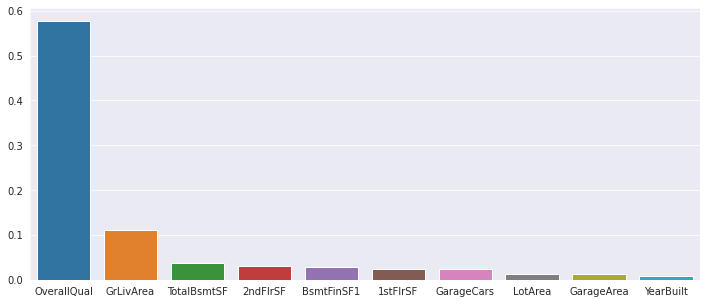

In [15]:
# Remove the Id columns and seperate out the sale price columns to run a random forest to get feature importance

X = df.copy()
Y = X.pop('SalePrice')
X.drop(columns = ['Id'], inplace = True)

for col in X.select_dtypes('object'):
    X[col], _ = X[col].factorize()
    
rf_model = RandomForestRegressor(random_state = 42)
rf_model.fit(X,Y)
importances = rf_model.feature_importances_
importances = pd.Series(importances, index = X.columns).sort_values(ascending = False)

f, ax = plt.subplots(1, figsize=(12, 5))
sns.barplot( x = importances[:10].index, y = importances[:10].values);
# ax[1].tick_params(axis='x', rotation=45);

### Feature Engineering

In [16]:
# Convert the YearBuilt, YearRemodAdd, GarageYrBlt, YrSold as no of years metrics
df['Age'] = df.apply(lambda row: row.get('YrSold') - row.get('YearBuilt'), axis = 1)
df['Remodel_Age'] = df.apply(lambda row: row.get('YrSold') - row.get('YearRemodAdd'), axis = 1)
df['Garage_Age'] = df.apply(lambda row: row.get('YrSold') - row.get('GarageYrBlt'), axis = 1)

# Get a total living area value
df['Total_living_area'] = df['TotalBsmtSF'] + df['GrLivArea']

# Get total number of bathrooms
df['Total_bathrooms'] = df['BsmtFullBath'] + df['FullBath'] + 0.5 * df['BsmtHalfBath'] + 0.5 * df['HalfBath']

# Get yes or no value for remodel
df['Is_remodeled'] = df.apply(lambda row: 1 if row['Age'] != row['Remodel_Age'] else 0, axis = 1)

# Consolidate porch values
df['Total_porch_area'] = df['OpenPorchSF'] + df['EnclosedPorch'] + df['3SsnPorch'] + df['ScreenPorch']

### Normalize and One Hot Encode

In [17]:
### Normalize / Standardize the numeric columns 
engineered_cols = ['Total_living_area', 'Total_bathrooms', 'Total_porch_area', 'Age', 'Remodel_Age', 'Garage_Age']
numeric_cols = list(numeric_cols) + engineered_cols 

In [18]:
# Separate numeric and categorical cols to normalize

numeric_df = df[numeric_cols]
categorical_df = df[[col for col in df.columns if col not in numeric_cols]]
target = numeric_df.pop('SalePrice')

In [19]:
# Scaled and merge numeric and categorical cols

scaler = StandardScaler()
scaled_numeric_arr = scaler.fit_transform(numeric_df)
scaled_numeric_df = pd.DataFrame(scaled_numeric_arr, columns = numeric_df.columns)
scaled_df = pd.merge(scaled_numeric_df, categorical_df, left_index = True, right_index = True)

In [20]:
# One hot encoding the categorical cols 
one_hot_encoded_df = pd.get_dummies(scaled_df, drop_first=False)

### Dropping correlated variables

In [21]:
df.drop(columns = ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'TotalBsmtSF'], inplace = True)

In [22]:
# Simple baseline model

# df_base = df.copy()
# cols_to_drop = list()
# for col in df_base.columns:
#     if df_base[col].isna().sum() > 0:
#         cols_to_drop.append(col)
        
# df_base.drop(columns = cols_to_drop, inplace = True)
# df_base.drop(columns = ['Id'], inplace = True)
        
# for col in df_base.select_dtypes('object'):
#     df_base[col], _ = df_base[col].factorize()
        
# base_Y = df_base.pop('SalePrice')
# base_X = df_base.copy()
# base_x_train, base_x_test, base_y_train, base_y_test = train_test_split(base_X, base_Y, test_size=0.2, shuffle = True, random_state = 42)

# base_reg = DecisionTreeRegressor()
# base_reg.fit(base_x_train, base_y_train)
# base_yhat = base_reg.predict(base_x_test)
# print(mean_squared_error(base_y_test, base_yhat))



In [23]:
#Impute garage nans
# garage_cols = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']
# for col in garage_cols:
#     df[col], _ = df[col].factorize()
# imputer  = KNNImputer(n_neighbors=3)
# garage_arr = imputer.fit_transform(df[garage_cols])
# garage_df = pd.DataFrame(garage_arr, columns = garage_cols)
# df.drop(columns = garage_cols, inplace = True)
# df = pd.concat([df, garage_df], axis = 1)

#Impute basement nans
# basement_cols = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']
# for col in basement_cols:
#     df[col], _ = df[col].factorize()
# imputer = KNNImputer(n_neighbors = 3)
# basement_arr = imputer.fit_transform(df[basement_cols])
# basement_df = pd.DataFrame(basement_arr, columns = basement_cols)
# df.drop(columns = basement_cols, inplace = True)
# df = pd.concat([df, basement_df], axis = 1)

# combine features with max nan values
# addn_features = ['MiscFeature' , 'PoolQC', 'Fence', 'FireplaceQu', 'Alley']
# df['addn_features'] = df[addn_features].notnull().sum(axis=1)
# df.drop(columns = addn_features, inplace = True)

# electrical_mode = df['Electrical'].mode().values[0]
# mvtype_mode = df['MasVnrType'].mode().values[0]
# df['Electrical'].fillna(value = electrical_mode, inplace = True)
# df['MasVnrType'].fillna(value = mvtype_mode, inplace = True)

#impute GarageYrBlt 
# df['GarageYrBlt'] = df.apply(lambda row: row['YearBuilt'] if row['GarageYrBlt'] else row['GarageYrBlt'], axis = 1)

# drop_cols = ['Id', 'LotFrontage', 'MasVnrArea']
# df.drop(columns = drop_cols, inplace = True)

# for col in df.select_dtypes(include = 'object'):
#     df[col], _ = df[col].factorize()

# y = df.pop('SalePrice')
# x_train, x_test, y_train, y_test = train_test_split(df, y, test_size=0.2, shuffle = True, random_state = 42)
# reg = DecisionTreeRegressor()
# reg.fit(x_train, y_train)
# yhat = reg.predict(x_test)
# print(mean_squared_error(y_test, yhat))


In [24]:
#PCA on area features 

In [25]:
#PCA on basement features

In [26]:
#PCA on garage features